In [1]:
import cv2
import numpy as np
lena = cv2.imread('data/lena.jpg', cv2.IMREAD_COLOR)

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
plt.rc('axes', **{'grid': False})#消除绘图中的网格

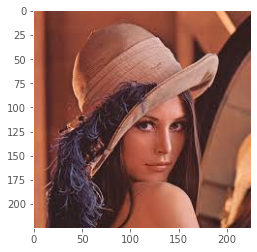

In [4]:
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

In [5]:
lena.shape

(225, 225, 3)

In [6]:
img_data = lena / 255.0
img_data = img_data.reshape((-1, 3))
img_data.shape

(50625, 3)

In [19]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    pixel = data[i].T
    R, G, B = pixel[0], pixel[1], pixel[2]
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

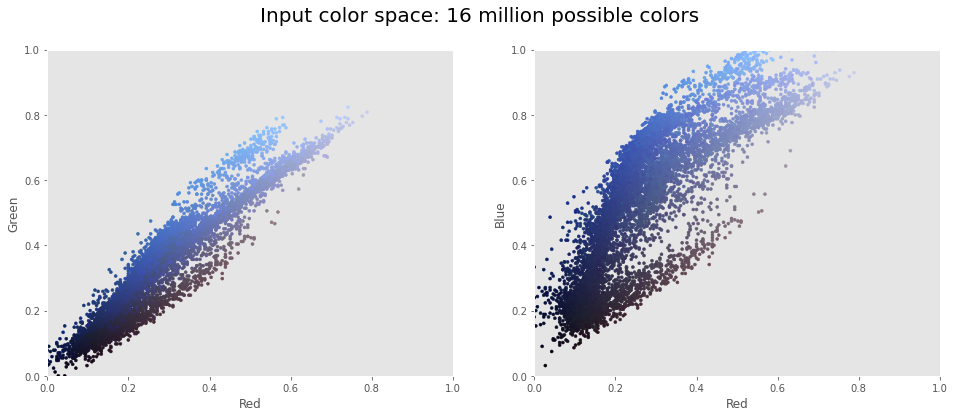

In [20]:
plot_pixels(img_data, title='Input color space: 16 million possible colors')

In [23]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
img_data = img_data.astype(np.float32)
compactness, labels, centers = cv2.kmeans(img_data, 16, None, criteria, 10, flags)

In [24]:
centers

array([[0.04678524, 0.02799818, 0.10396719],
       [0.19499989, 0.17284413, 0.26607278],
       [0.49899313, 0.61490333, 0.8668845 ],
       [0.29749316, 0.38353726, 0.6651306 ],
       [0.13770083, 0.21434881, 0.48593327],
       [0.19184522, 0.21516825, 0.40984827],
       [0.5726756 , 0.5362428 , 0.6036686 ],
       [0.11796228, 0.11718145, 0.20391545],
       [0.16154447, 0.22726887, 0.4820188 ],
       [0.6382372 , 0.690645  , 0.8777667 ],
       [0.0622549 , 0.1495098 , 0.49803922],
       [0.5196079 , 0.5656863 , 0.6892157 ],
       [0.22313748, 0.2766734 , 0.5156415 ],
       [0.5164517 , 0.57026243, 0.7615211 ],
       [0.20291933, 0.2772012 , 0.5793109 ],
       [0.46116364, 0.5082268 , 0.70720565]], dtype=float32)

In [28]:
new_colors = centers[labels].reshape((-1, 3))

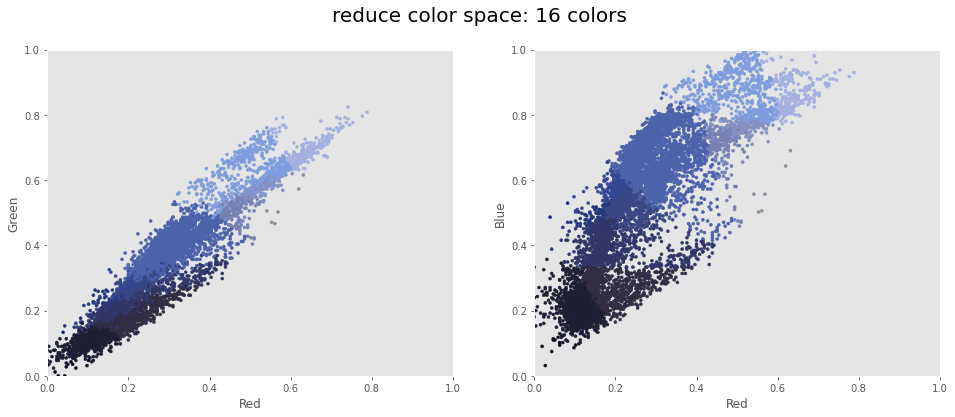

In [30]:
plot_pixels(img_data, colors=new_colors, title="reduce color space: 16 colors")

In [31]:
lena_recolored = new_colors.reshape(lena.shape)

In [62]:
# lena_recolored2 = lena_recolored * 255
# lena_recolored2 = lena_recolored2.astype(np.uint8)

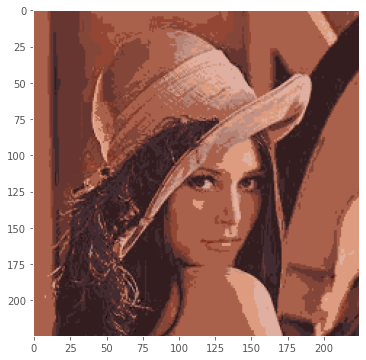

In [63]:
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(lena_recolored, cv2.COLOR_BGR2RGB))